# Qualifying WEC Hypercar Analysis - 24h Le Mans 2025

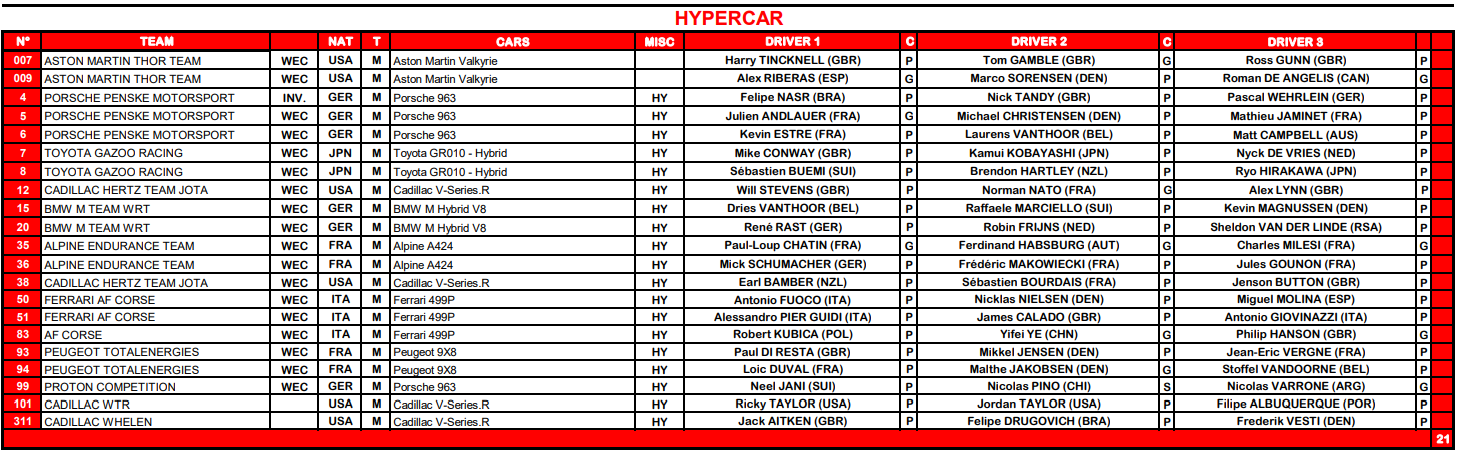

****

In [122]:
import pandas as pd
import numpy as np

QF = pd.read_csv("C:/Users/juanp/Downloads/23_AnalysisEnduranceWithSections_Qualifying HYPERCAR.csv", 
                 sep=";",
                 dtype={'LAP_TIME': str, 'S1': str, 'S2': str, 'S3': str})
H1 = pd.read_csv("C:/Users/juanp/Downloads/23_AnalysisEnduranceWithSections_Hyperpole 1 HYPERCAR.csv", 
                 sep=";",
                 dtype={'LAP_TIME': str, 'S1': str, 'S2': str, 'S3': str})
H2 = pd.read_csv("C:/Users/juanp/Downloads/23_AnalysisEnduranceWithSections_Hyperpole 2 HYPERCAR.csv", 
                 sep=";",
                 dtype={'LAP_TIME': str, 'S1': str, 'S2': str, 'S3': str})




In [ ]:
QF.head(5)

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,...,PITREF_time,PITREF_elapsed,SCL1_time,SCL1_elapsed,FORDOUT_time,FORDOUT_elapsed,FL_time,FL_elapsed,Unnamed: 59,LAP_TIME_SECONDS
0,007,1,1,5:04.028,0,NaN,1:35.082,0,1:31.427,0,...,10.860,4:41.200,5.931,4:47.131,13.354,5:00.485,3.543,5:04.028,NaN,304.028
1,007,1,2,3:27.043,0,NaN,32.747,0,1:19.345,0,...,7.818,3:14.734,2.583,3:17.317,6.207,3:23.524,3.519,3:27.043,NaN,207.043
2,007,1,3,3:46.233,0,NaN,33.719,0,1:26.206,0,...,9.047,3:32.223,3.815,3:36.038,6.773,3:42.811,3.422,3:46.233,NaN,226.233
3,007,1,4,3:26.639,0,NaN,32.483,0,1:19.311,0,...,7.774,3:14.442,2.543,3:16.985,6.145,3:23.130,3.509,3:26.639,NaN,206.639
4,007,1,5,3:35.593,0,B,33.788,0,1:19.695,0,...,7.775,3:16.973,2.674,3:19.647,NaN,NaN,NaN,3:35.593,NaN,215.593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,50,2,4,3:38.944,0,B,33.552,0,1:20.999,0,...,8.123,3:19.203,2.959,3:22.162,NaN,NaN,NaN,3:38.944,NaN,218.944
96,50,1,5,6:53.803,0,NaN,3:26.764,0,1:34.323,0,...,9.197,6:36.868,3.117,6:39.985,10.417,6:50.402,3.401,6:53.803,NaN,413.803
97,50,1,6,3:23.514,2,NaN,32.063,0,1:18.094,2,...,7.630,3:11.132,2.477,3:13.609,6.209,3:19.818,3.696,3:23.514,NaN,203.514
98,50,1,7,4:42.157,0,NaN,43.224,0,1:50.585,0,...,9.349,4:28.353,3.052,4:31.405,7.370,4:38.775,3.382,4:42.157,NaN,282.157


In [ ]:

def correct_car_number(row):
    if row['NUMBER'] == 7:
        if 'Aston Martin' in row['MANUFACTURER']:
            return '007'
        elif 'Toyota' in row['MANUFACTURER']:
            return '7'
    elif row['NUMBER'] == 9:
        return '009'
    return str(row['NUMBER'])


for df in [QF, H1, H2]:
    df['NUMBER'] = df.apply(correct_car_number, axis=1)

In [125]:
QF.columns = QF.columns.str.strip()
H1.columns = H1.columns.str.strip()
H2.columns = H2.columns.str.strip()

## Laps To Seconds

In [126]:
def convert_time_to_seconds(time_str):
    try:
        if pd.isna(time_str):
            return None
        
        # Convertir string "mm:ss.SSS" a segundos
        minutes, rest = str(time_str).split(':')
        seconds, milliseconds = rest.split('.')
        
        total_seconds = (int(minutes) * 60) + int(seconds) + (int(milliseconds)/1000)
        return total_seconds
        
    except Exception as e:
        print(f"Error converting: {time_str}")
        return None

for df in [QF, H1, H2]:
    df['LAP_TIME_SECONDS'] = df['LAP_TIME'].apply(convert_time_to_seconds)


print("\nFirst 5 rows of QF with LAP_TIME_SECONDS:")
print(QF[['LAP_TIME', 'LAP_TIME_SECONDS']].head())


First 5 rows of QF with LAP_TIME_SECONDS:
   LAP_TIME  LAP_TIME_SECONDS
0  5:04.028           304.028
1  3:27.043           207.043
2  3:46.233           226.233
3  3:26.639           206.639
4  3:35.593           215.593


## ALL-Sessions Qualifying New Dataset

In [ ]:

columns = [
    
    "NUMBER", "DRIVER_NUMBER", "DRIVER_NAME", "CLASS", "TEAM", "MANUFACTURER", 
    
    
    "LAP_NUMBER", "LAP_TIME_SECONDS", "LAP_IMPROVEMENT",
    
    
    "S1_SECONDS", "S1_IMPROVEMENT",
    "S2_SECONDS", "S2_IMPROVEMENT", 
    "S3_SECONDS", "S3_IMPROVEMENT",
    
    
    "KPH", "TOP_SPEED",
    
    
    "FLAG_AT_FL"
]

QF_SUMMARY = QF[columns].copy()
QF_SUMMARY['SESSION'] = 'Qualifying'

H1_SUMMARY = H1[columns].copy()
H1_SUMMARY['SESSION'] = 'Hyperpole 1'

H2_SUMMARY = H2[columns].copy()
H2_SUMMARY['SESSION'] = 'Hyperpole 2'

ALL_SESSIONS = pd.concat([QF_SUMMARY, H1_SUMMARY, H2_SUMMARY])


cols = ['SESSION'] + [col for col in ALL_SESSIONS.columns if col != 'SESSION']
ALL_SESSIONS = ALL_SESSIONS[cols]


ALL_SESSIONS = ALL_SESSIONS.sort_values("LAP_TIME_SECONDS", ascending=True)


In [128]:
ALL_SESSIONS.head()

,SESSION,NUMBER,DRIVER_NUMBER,DRIVER_NAME,CLASS,TEAM,MANUFACTURER,LAP_NUMBER,LAP_TIME_SECONDS,LAP_IMPROVEMENT,S1_SECONDS,S1_IMPROVEMENT,S2_SECONDS,S2_IMPROVEMENT,S3_SECONDS,S3_IMPROVEMENT,KPH,TOP_SPEED,FLAG_AT_FL
34,Hyperpole 1,311,1,Jack AITKEN,HYPERCAR,Cadillac Whelen,Cadillac,6,202.742,3,31.801,3,78.235,2,92.706,3,242.0,334.9,FF
30,Qualifying,12,3,Alex LYNN,HYPERCAR,Cadillac Hertz Team JOTA,Cadillac,7,202.847,3,31.785,2,78.406,2,92.656,2,241.8,329.8,GF
37,Qualifying,15,1,Dries VANTHOOR,HYPERCAR,BMW M Team WRT,BMW,6,202.887,2,32.084,2,78.148,2,92.655,3,241.8,337.0,GF
52,Hyperpole 1,38,2,Sébastien BOURDAIS,HYPERCAR,Cadillac Hertz Team JOTA,Cadillac,6,203.141,2,31.909,2,78.276,2,92.956,2,241.5,332.9,FF
106,Qualifying,51,3,Antonio GIOVINAZZI,HYPERCAR,Ferrari AF Corse,Ferrari,7,203.163,2,31.999,1,78.106,2,93.058,2,241.4,334.9,GF


In [205]:
ALL_SESSIONS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 34 to 85
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SESSION           120 non-null    object 
 1   NUMBER            120 non-null    object 
 2   DRIVER_NUMBER     120 non-null    int64  
 3   DRIVER_NAME       120 non-null    object 
 4   CLASS             120 non-null    object 
 5   TEAM              120 non-null    object 
 6   MANUFACTURER      120 non-null    object 
 7   LAP_NUMBER        120 non-null    int64  
 8   LAP_TIME_SECONDS  120 non-null    float64
 9   LAP_IMPROVEMENT   120 non-null    int64  
 10  S1_SECONDS        120 non-null    float64
 11  S1_IMPROVEMENT    120 non-null    int64  
 12  S2_SECONDS        120 non-null    float64
 13  S2_IMPROVEMENT    120 non-null    int64  
 14  S3_SECONDS        120 non-null    float64
 15  S3_IMPROVEMENT    120 non-null    int64  
 16  KPH               120 non-null    float64
 17  TO

## Analysis of Lap Times Above/Below 210 Seconds

In [ ]:

above_210 = ALL_SESSIONS[ALL_SESSIONS['LAP_TIME_SECONDS'] > 210].shape[0]
below_210 = ALL_SESSIONS[ALL_SESSIONS['LAP_TIME_SECONDS'] <= 210].shape[0]

print(f"\nAnalysis of Valid Lap Times (GF only):")
print(f"Laps above 210 seconds: {above_210}")
print(f"Laps below or equal 210 seconds: {below_210}")

total_laps = ALL_SESSIONS.shape[0]
print(f"\nPercentage Analysis:")
print(f"Above 210s: {(above_210/total_laps*100):.2f}%")
print(f"Below or equal 210s: {(below_210/total_laps*100):.2f}%")

print(f"\nLap Time Statistics (in seconds):")
print(ALL_SESSIONS['LAP_TIME_SECONDS'].describe())


Analysis of Valid Lap Times (GF only):
Laps above 210 seconds: 165
Laps below or equal 210 seconds: 120

Percentage Analysis:
Above 210s: 57.89%
Below or equal 210s: 42.11%

Lap Time Statistics (in seconds):
count     285.000000
mean      243.185691
std        75.097867
min       202.742000
25%       204.845000
50%       214.895000
75%       263.846000
max      1084.545000
Name: LAP_TIME_SECONDS, dtype: float64


## Filter by 210 seconds maximum lap time

In [ ]:

ALL_SESSIONS = ALL_SESSIONS[ALL_SESSIONS['LAP_TIME_SECONDS'] <= 210]


total_laps = ALL_SESSIONS.shape[0]
print(f"\nTotal valid laps under 210 seconds: {total_laps}")


print(f"\nLap Time Statistics for laps under 210s (in seconds):")
print(ALL_SESSIONS['LAP_TIME_SECONDS'].describe())

print("\nLaps under 210s by session:")
print(ALL_SESSIONS['SESSION'].value_counts())


Total valid laps under 210 seconds: 120

Lap Time Statistics for laps under 210s (in seconds):
count    120.000000
mean     204.783608
std        1.194768
min      202.742000
25%      204.005250
50%      204.469000
75%      205.310000
max      208.712000
Name: LAP_TIME_SECONDS, dtype: float64

Laps under 210s by session:
SESSION
Qualifying     62
Hyperpole 1    39
Hyperpole 2    19
Name: count, dtype: int64


In [ ]:
best_laps = ALL_SESSIONS[ALL_SESSIONS['FLAG_AT_FL'].isin(['GF', 'FF'])].groupby('NUMBER').agg({
    'SESSION': 'first',
    'DRIVER_NAME': 'first',
    'TEAM': 'first',
    'MANUFACTURER': 'first',
    'LAP_TIME_SECONDS': 'min',
    'S1_SECONDS': 'min',
    'S2_SECONDS': 'min',
    'S3_SECONDS': 'min',
    'TOP_SPEED': 'max',
    'FLAG_AT_FL': 'first'  
}).reset_index()


best_laps = best_laps.sort_values('LAP_TIME_SECONDS', ascending=True)


print("\nBest Lap Times by Car:")
print("=====================")
for _, row in best_laps.iterrows():
    print(f"\nCar #{row['NUMBER']} - {row['MANUFACTURER']} ({row['TEAM']})")
    print(f"Driver: {row['DRIVER_NAME']}")
    print(f"Session: {row['SESSION']}")
    print(f"Lap Time: {row['LAP_TIME_SECONDS']:.3f}")
    print(f"Flag Type: {row['FLAG_AT_FL']}")
    print(f"Sectors: S1={row['S1_SECONDS']:.3f}, S2={row['S2_SECONDS']:.3f}, S3={row['S3_SECONDS']:.3f}")
    print(f"Top Speed: {row['TOP_SPEED']:.1f} KPH")
    print("-" * 50)


Best Lap Times by Car:

Car #311 - Cadillac (Cadillac Whelen)
Driver: Jack AITKEN
Session: Hyperpole 1
Lap Time: 202.742
Flag Type: FF
Sectors: S1=31.801, S2=78.235, S3=92.706
Top Speed: 338.1 KPH
--------------------------------------------------

Car #12 - Cadillac (Cadillac Hertz Team JOTA)
Driver: Alex LYNN
Session: Qualifying
Lap Time: 202.847
Flag Type: GF
Sectors: S1=31.785, S2=78.269, S3=92.452
Top Speed: 340.2 KPH
--------------------------------------------------

Car #15 - BMW (BMW M Team WRT)
Driver: Dries VANTHOOR
Session: Qualifying
Lap Time: 202.887
Flag Type: GF
Sectors: S1=32.084, S2=78.148, S3=92.655
Top Speed: 337.0 KPH
--------------------------------------------------

Car #38 - Cadillac (Cadillac Hertz Team JOTA)
Driver: Sébastien BOURDAIS
Session: Hyperpole 1
Lap Time: 203.141
Flag Type: FF
Sectors: S1=31.772, S2=78.276, S3=92.605
Top Speed: 333.9 KPH
--------------------------------------------------

Car #51 - Ferrari (Ferrari AF Corse)
Driver: Antonio GIOVINA

## Le Mans - Best Qualifying Laps

In [ ]:
import pandas as pd
from IPython.display import display, HTML


def format_time(seconds):
    minutes = int(seconds // 60)
    remaining_seconds = seconds % 60
    return f"{minutes}:{remaining_seconds:06.3f}"


styled_laps = best_laps.copy()
styled_laps['LAP_TIME'] = styled_laps['LAP_TIME_SECONDS'].apply(format_time)
styled_laps['S1'] = styled_laps['S1_SECONDS'].apply(lambda x: f"{x:.3f}")
styled_laps['S2'] = styled_laps['S2_SECONDS'].apply(lambda x: f"{x:.3f}")
styled_laps['S3'] = styled_laps['S3_SECONDS'].apply(lambda x: f"{x:.3f}")


display_cols = {
    'NUMBER': 'Car #',
    'MANUFACTURER': 'Manufacturer',
    'TEAM': 'Team',
    'DRIVER_NAME': 'Driver',
    'SESSION': 'Session',
    'LAP_TIME': 'Lap Time',
    'S1': 'Sector 1',
    'S2': 'Sector 2',
    'S3': 'Sector 3',
    'TOP_SPEED': 'Top Speed',
    'FLAG_AT_FL': 'Flag'
}

styled_table = styled_laps[display_cols.keys()].rename(columns=display_cols)


def highlight_fastest(s):
    is_min = s.astype(str) == s.min()
    return ['background-color: #b7f7b7; font-weight: bold;' if v else '' for v in is_min]


table_styles = [
    {'selector': 'thead th', 'props': [
        ('background-color', '#2C3E50'),
        ('color', 'white'),
        ('font-size', '14px'),
        ('text-align', 'center'),
        ('padding', '10px')
    ]},
    {'selector': 'tbody td', 'props': [
        ('padding', '8px'),
        ('text-align', 'center'),
        ('font-size', '13px'),
        ('border-bottom', '1px solid #ccc')
    ]},
    {'selector': 'caption', 'props': [
        ('caption-side', 'top'),
        ('font-size', '18px'),
        ('color', '#2C3E50'),
        ('font-weight', 'bold'),
        ('margin-bottom', '10px')
    ]}
]


styled_output = styled_table.style \
    .set_table_styles(table_styles) \
    .apply(highlight_fastest, subset=['Lap Time', 'Sector 1', 'Sector 2', 'Sector 3']) \
    .format({
        'Top Speed': '{:.1f} KPH'
    }) \
    .set_caption('🏁 Le Mans 2025 — Best Qualifying Laps') \
    .hide(axis="index")


display(styled_output)


Car #,Manufacturer,Team,Driver,Session,Lap Time,Sector 1,Sector 2,Sector 3,Top Speed,Flag
311,Cadillac,Cadillac Whelen,Jack AITKEN,Hyperpole 1,3:22.742,31.801,78.235,92.706,338.1 KPH,FF
12,Cadillac,Cadillac Hertz Team JOTA,Alex LYNN,Qualifying,3:22.847,31.785,78.269,92.452,340.2 KPH,GF
15,BMW,BMW M Team WRT,Dries VANTHOOR,Qualifying,3:22.887,32.084,78.148,92.655,337.0 KPH,GF
38,Cadillac,Cadillac Hertz Team JOTA,Sébastien BOURDAIS,Hyperpole 1,3:23.141,31.772,78.276,92.605,333.9 KPH,FF
51,Ferrari,Ferrari AF Corse,Antonio GIOVINAZZI,Qualifying,3:23.163,31.855,78.106,93.058,337.0 KPH,GF
20,BMW,BMW M Team WRT,Robin FRIJNS,Hyperpole 1,3:23.250,32.072,78.242,92.936,337.0 KPH,FF
50,Ferrari,Ferrari AF Corse,Miguel MOLINA,Hyperpole 1,3:23.273,32.063,77.966,92.978,341.3 KPH,FF
6,Porsche,Porsche Penske Motorsport,Kévin ESTRE,Qualifying,3:23.360,31.823,78.128,93.409,337.0 KPH,GF
36,Alpine,Alpine Endurance Team,Mick SCHUMACHER,Hyperpole 1,3:23.462,31.926,78.178,93.358,339.1 KPH,GF
5,Porsche,Porsche Penske Motorsport,Mathieu JAMINET,Hyperpole 2,3:23.475,31.876,78.110,93.205,341.3 KPH,GF


## Best Lap Time by Driver

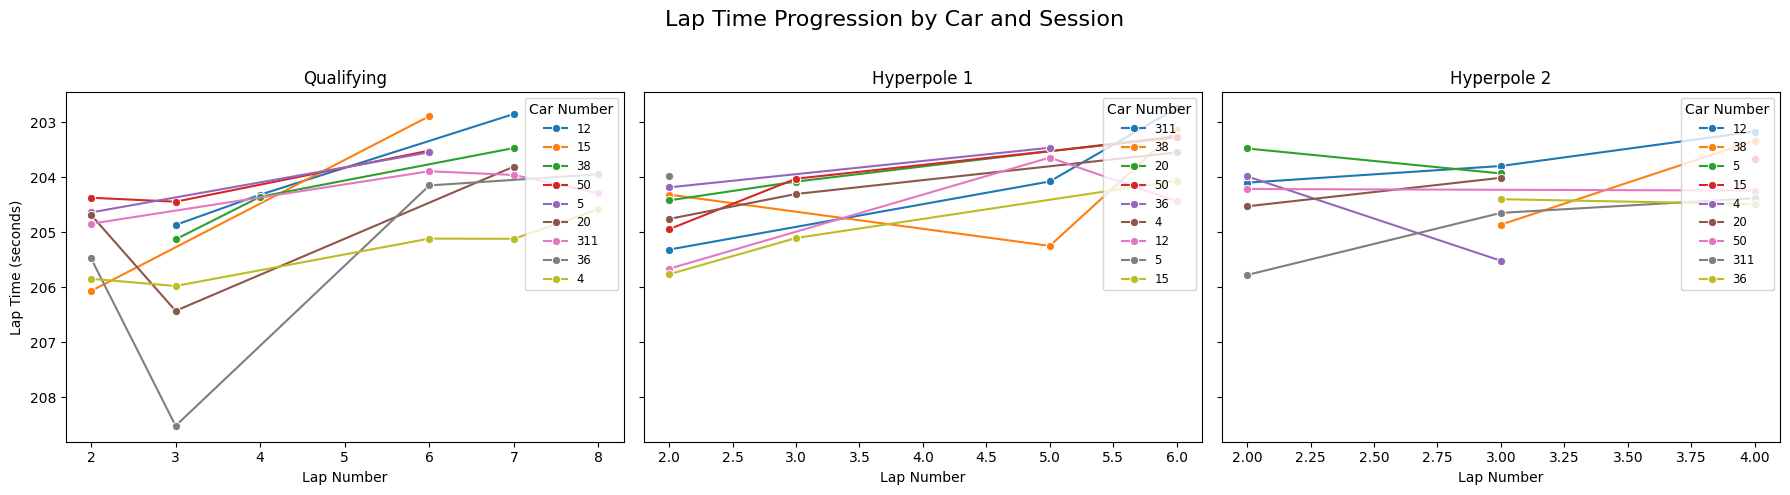

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')


cars_h2 = ALL_SESSIONS[ALL_SESSIONS['SESSION'] == 'Hyperpole 2']['NUMBER'].unique()
laps_h2_cars = ALL_SESSIONS[
    (ALL_SESSIONS['NUMBER'].isin(cars_h2)) &
    (ALL_SESSIONS['FLAG_AT_FL'].isin(['GF', 'FF']))
].copy()

sessions = ['Qualifying', 'Hyperpole 1', 'Hyperpole 2']
session_titles = {
    'Qualifying': 'Qualifying',
    'Hyperpole 1': 'Hyperpole 1',
    'Hyperpole 2': 'Hyperpole 2'
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, session in enumerate(sessions):
    session_data = laps_h2_cars[laps_h2_cars['SESSION'] == session]
    sns.lineplot(
        data=session_data,
        x='LAP_NUMBER',
        y='LAP_TIME_SECONDS',
        hue='NUMBER',
        marker='o',
        palette='tab10',
        ax=axes[i]
    )
    axes[i].set_title(session_titles[session])
    axes[i].set_xlabel('Lap Number')
    axes[i].set_ylabel('Lap Time (seconds)')
    axes[i].invert_yaxis()
    axes[i].legend(title='Car Number', loc='upper right', fontsize='small')

fig.suptitle('Lap Time Progression by Car and Session', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Lap Time Distribution By Session

C:\Users\juanp\AppData\Local\Temp\ipykernel_28344\4024352301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


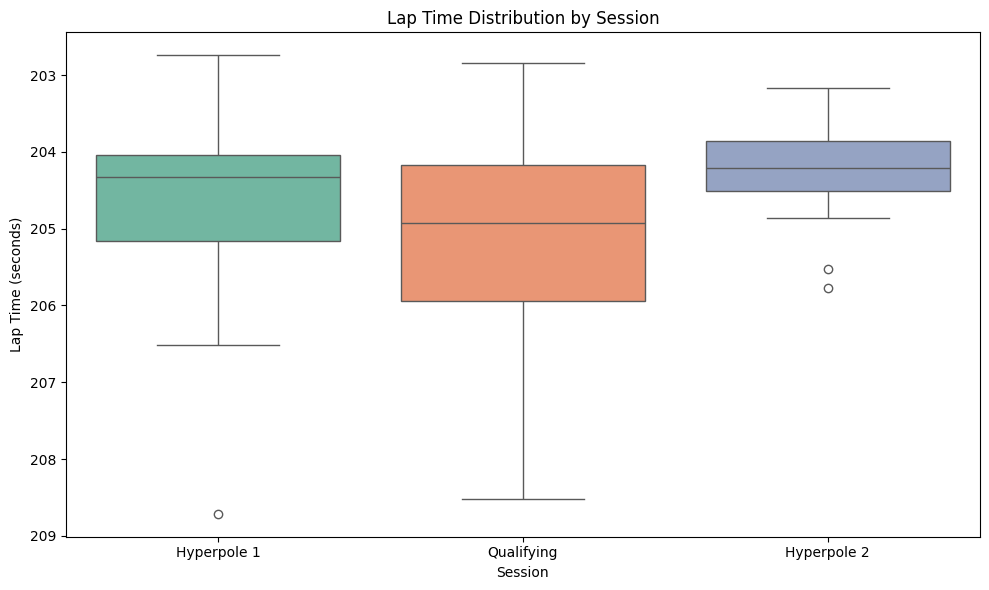

In [169]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=ALL_SESSIONS,
    x='SESSION',
    y='LAP_TIME_SECONDS',
    palette='Set2'
)
plt.title('Lap Time Distribution by Session')
plt.xlabel('Session')
plt.ylabel('Lap Time (seconds)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Histogram of Lap Times

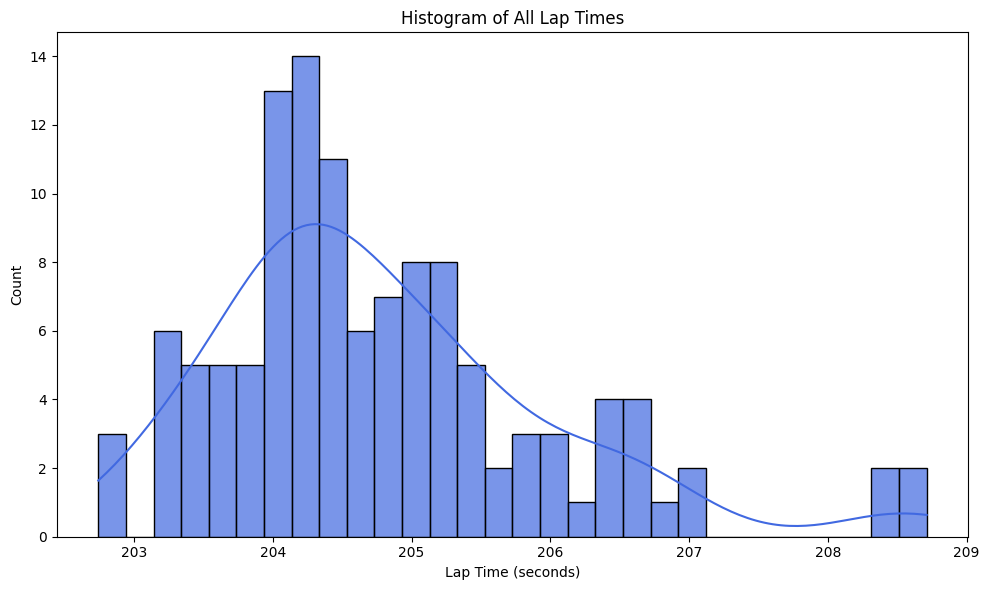

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('default')

plt.figure(figsize=(10, 6))
sns.histplot(
    ALL_SESSIONS['LAP_TIME_SECONDS'],
    bins=30,
    kde=True,
    color='royalblue',
    edgecolor='black',
    alpha=0.7
)
plt.title('Histogram of All Lap Times')
plt.xlabel('Lap Time (seconds)')
plt.ylabel('Count')
plt.gca().set_facecolor('white')  
plt.gcf().set_facecolor('white')  
plt.tight_layout()
plt.show()

## Best sector times by car and Manufacturer

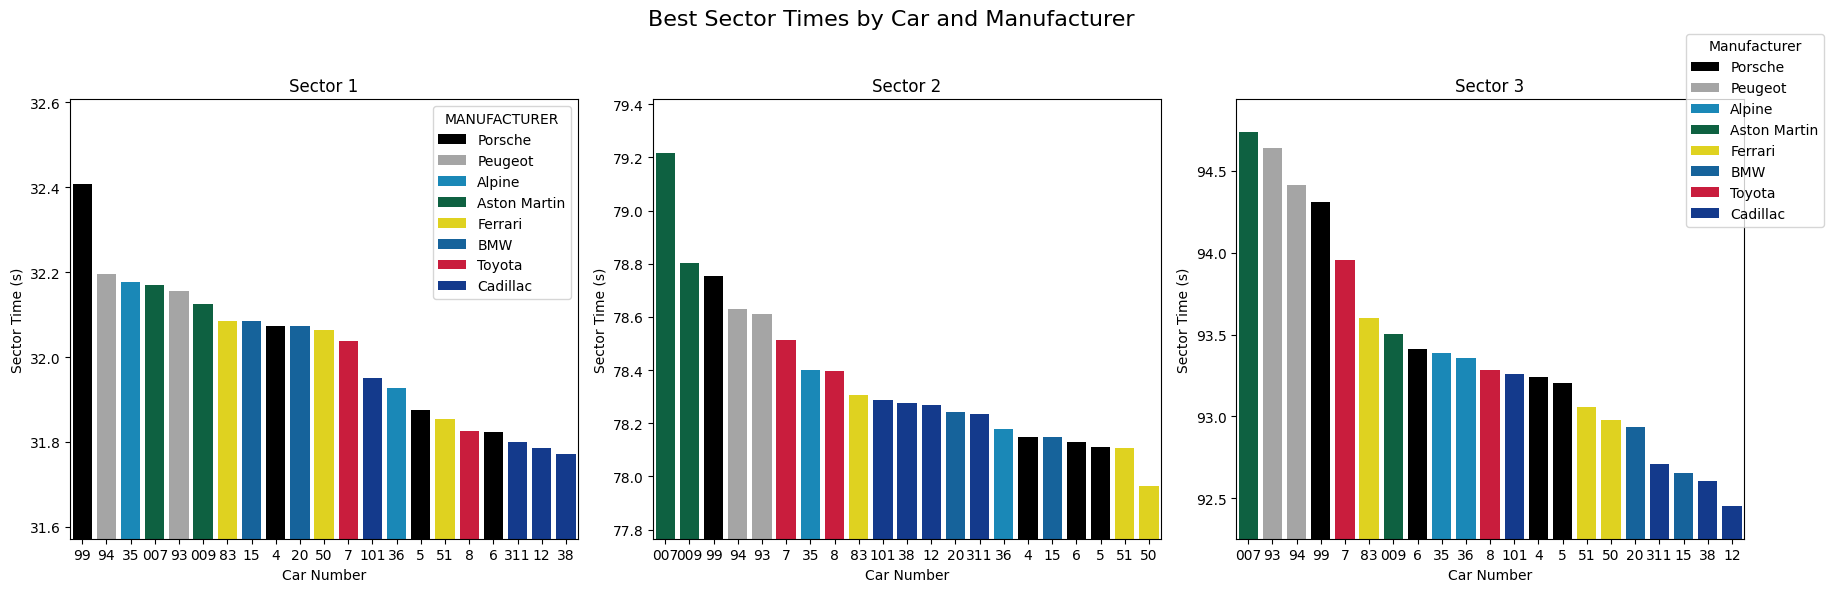

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from PIL import Image
from io import BytesIO
import numpy as np


manufacturer_palette = {
    'Toyota': '#E6002B',
    'Ferrari': '#FFED00',
    'Porsche': '#000000',
    'Cadillac': '#0033A0',
    'Peugeot': '#A5A5A5',
    'BMW': '#0066B1',
    'Alpine': '#0092D1',
    'Aston Martin': '#006F44'
}



def get_logo_img(url, size=(40, 40)):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content)).convert("RGBA")
        img = img.resize(size, Image.LANCZOS)
        return np.array(img)
    except Exception as e:
        return None




best_laps = ALL_SESSIONS[ALL_SESSIONS['FLAG_AT_FL'].isin(['GF', 'FF'])].groupby('NUMBER').agg({
    'MANUFACTURER': 'first',
    'S1_SECONDS': 'min',
    'S2_SECONDS': 'min',
    'S3_SECONDS': 'min'
}).reset_index()

best_laps_melted = best_laps.melt(
    id_vars=['NUMBER', 'MANUFACTURER'],
    value_vars=['S1_SECONDS', 'S2_SECONDS', 'S3_SECONDS'],
    var_name='Sector',
    value_name='Time (s)'
)


sectors = ['S1_SECONDS', 'S2_SECONDS', 'S3_SECONDS']
sector_titles = {'S1_SECONDS': 'Sector 1', 'S2_SECONDS': 'Sector 2', 'S3_SECONDS': 'Sector 3'}

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)

for i, sector in enumerate(sectors):
    data_sector = best_laps_melted[best_laps_melted['Sector'] == sector].copy()
    
    data_sector = data_sector.sort_values('Time (s)', ascending=False)
    sns.barplot(
        data=data_sector,
        x='NUMBER',
        y='Time (s)',
        hue='MANUFACTURER',
        palette=manufacturer_palette,
        dodge=False,
        ax=axes[i],
        order=data_sector['NUMBER']
    )
    axes[i].set_title(sector_titles[sector])
    axes[i].set_xlabel('Car Number')
    axes[i].set_ylabel('Sector Time (s)')
    
    min_y = data_sector['Time (s)'].min() - 0.2
    max_y = data_sector['Time (s)'].max() + 0.2
    axes[i].set_ylim(min_y, max_y)
    if i != 0:
        axes[i].get_legend().remove()

    
    for bar, (_, row) in zip(axes[i].patches, data_sector.iterrows()):
        logo = logos_img.get(row['MANUFACTURER'])
        if logo is not None:
            bar_x = bar.get_x() + bar.get_width() / 2 - 0.02
            bar_y = bar.get_height() + 0.05
            axes[i].imshow(
                logo,
                aspect='auto',
                extent=(bar_x-0.18, bar_x+0.18, bar_y, bar_y+0.7),
                zorder=10
            )


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Manufacturer', bbox_to_anchor=(1.02, 0.95))
fig.suptitle('Best Sector Times by Car and Manufacturer ', fontsize=16)
plt.tight_layout(rect=[0, 0, 0.98, 0.95])
plt.show()

## Best Lap Time by Manufacturer

C:\Users\juanp\AppData\Local\Temp\ipykernel_28344\1193249294.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


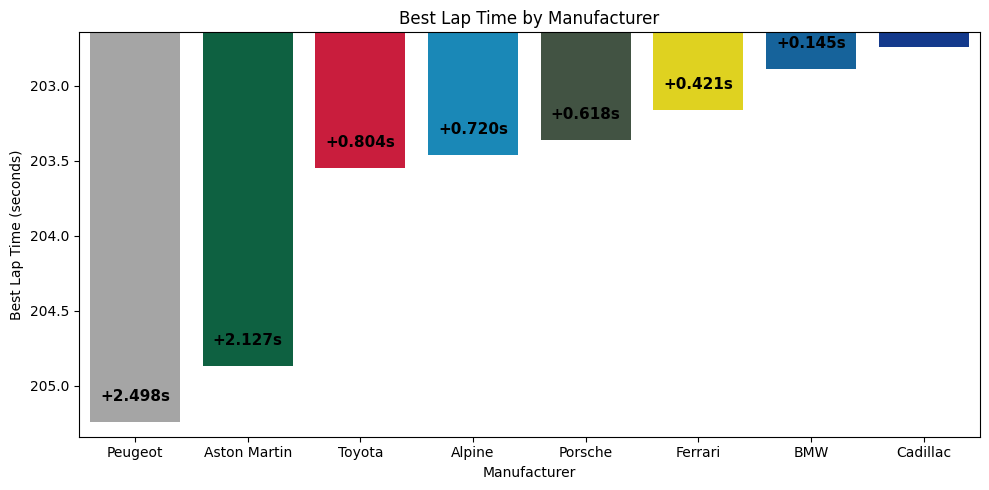

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

manufacturer_palette = {
    'Toyota': '#E6002B',
    'Ferrari': '#FFED00',
    'Porsche': "#3F5640",
    'Cadillac': '#0033A0',
    'Peugeot': '#A5A5A5',
    'BMW': '#0066B1',
    'Alpine': '#0092D1',
    'Aston Martin': '#006F44'
}

best_laps = ALL_SESSIONS[ALL_SESSIONS['FLAG_AT_FL'].isin(['GF', 'FF'])].groupby(['MANUFACTURER', 'NUMBER']).agg({
    'LAP_TIME_SECONDS': 'min'
}).reset_index()

best_by_manufacturer = best_laps.groupby('MANUFACTURER')['LAP_TIME_SECONDS'].min().reset_index()

best_by_manufacturer = best_by_manufacturer.sort_values('LAP_TIME_SECONDS', ascending=False).reset_index(drop=True)

best_time = best_by_manufacturer['LAP_TIME_SECONDS'].min()
best_by_manufacturer['Delta'] = best_by_manufacturer['LAP_TIME_SECONDS'] - best_time

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=best_by_manufacturer, 
    x='MANUFACTURER', 
    y='LAP_TIME_SECONDS', 
    palette=[manufacturer_palette.get(m, "#888888") for m in best_by_manufacturer['MANUFACTURER']],
    order=best_by_manufacturer['MANUFACTURER']
)
plt.title('Best Lap Time by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Best Lap Time (seconds)')

min_time = best_by_manufacturer['LAP_TIME_SECONDS'].min()
max_time = best_by_manufacturer['LAP_TIME_SECONDS'].max()
plt.ylim(max_time + 0.1, min_time - 0.1) 

for bar, (_, row) in zip(ax.patches, best_by_manufacturer.iterrows()):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    delta = row['Delta']
    manu = row['MANUFACTURER']
    if np.isclose(delta, 0, atol=1e-4):
        label = f"{y:.3f}s"
        color = "white"
    else:
        label = f"+{delta:.3f}s"
        color = "black"
    # Coloca el texto justo encima de la barra (fuera)
    plt.text(x, y - 0.12, label, ha='center', va='bottom', fontweight='bold', fontsize=11, color=color)

plt.tight_layout()
plt.show()

## Best Sector Times by Car and Manufacturer

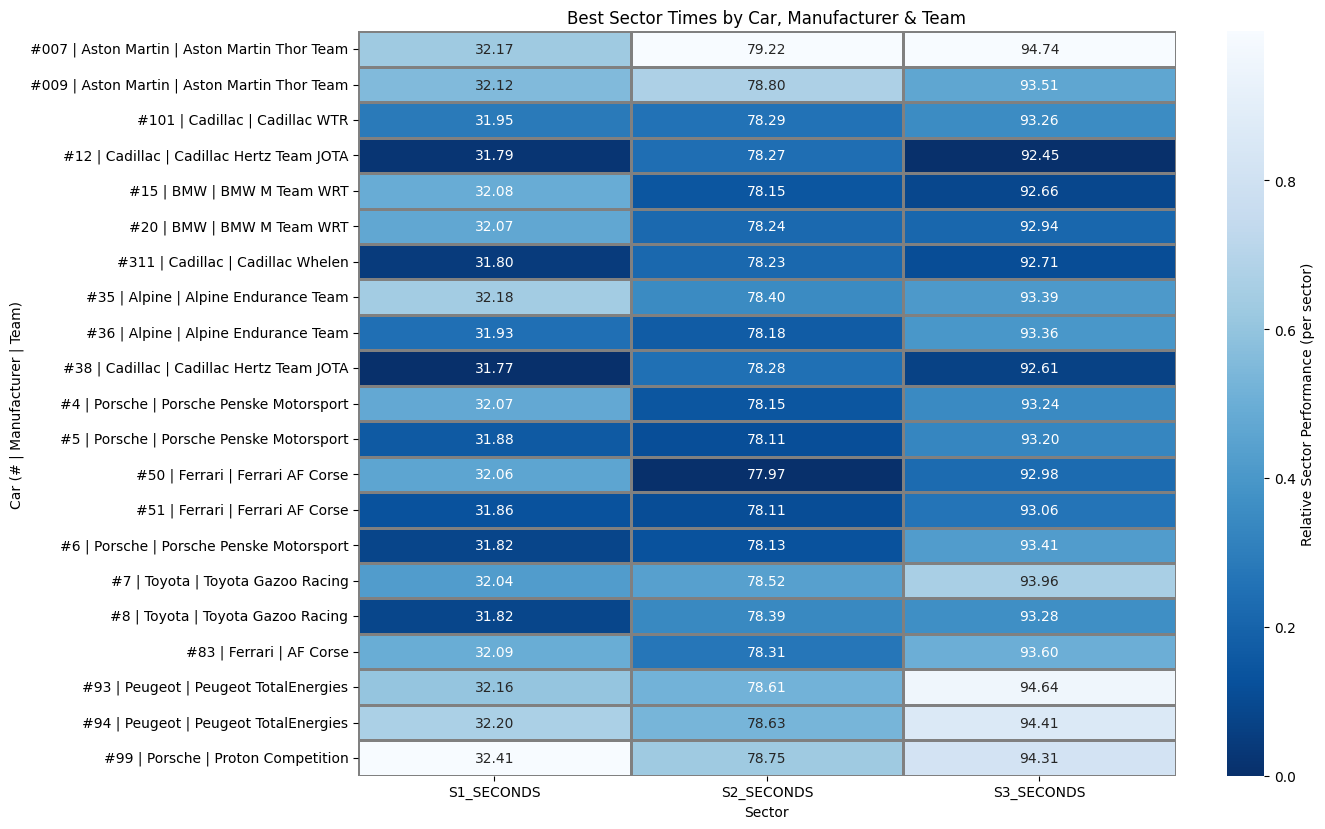

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

best_laps = ALL_SESSIONS[ALL_SESSIONS['FLAG_AT_FL'].isin(['GF', 'FF'])].groupby(['NUMBER', 'MANUFACTURER', 'TEAM']).agg({
    'S1_SECONDS': 'min',
    'S2_SECONDS': 'min',
    'S3_SECONDS': 'min'
}).reset_index()

best_laps['Car'] = (
    '#' + best_laps['NUMBER'].astype(str) + 
    ' | ' + best_laps['MANUFACTURER'] + 
    ' | ' + best_laps['TEAM']
)

heatmap_data = best_laps.set_index('Car')[['S1_SECONDS', 'S2_SECONDS', 'S3_SECONDS']]

normed = heatmap_data.copy()
for col in normed.columns:
    min_val = normed[col].min()
    max_val = normed[col].max()
    normed[col] = (normed[col] - min_val) / (max_val - min_val + 1e-9)

plt.figure(figsize=(14, max(6, 0.4*len(heatmap_data))))
sns.heatmap(
    normed, 
    annot=heatmap_data, 
    fmt=".2f", 
    cmap="Blues_r", 
    linewidths=.8, 
    linecolor='gray', 
    cbar_kws={'label': 'Relative Sector Performance (per sector)'}
)
plt.title('Best Sector Times by Car, Manufacturer & Team')
plt.xlabel('Sector')
plt.ylabel('Car (# | Manufacturer | Team)')
plt.tight_layout() 
plt.show()